In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column 'petal_width' and 'species'.
df = pd.read_csv('Iris.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

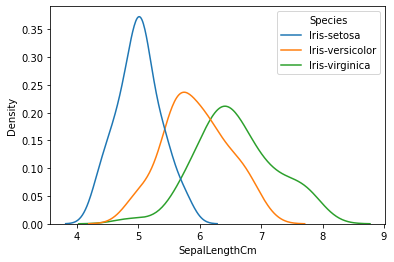

In [4]:
sns.kdeplot(data=df,x='SepalLengthCm',hue='Species')

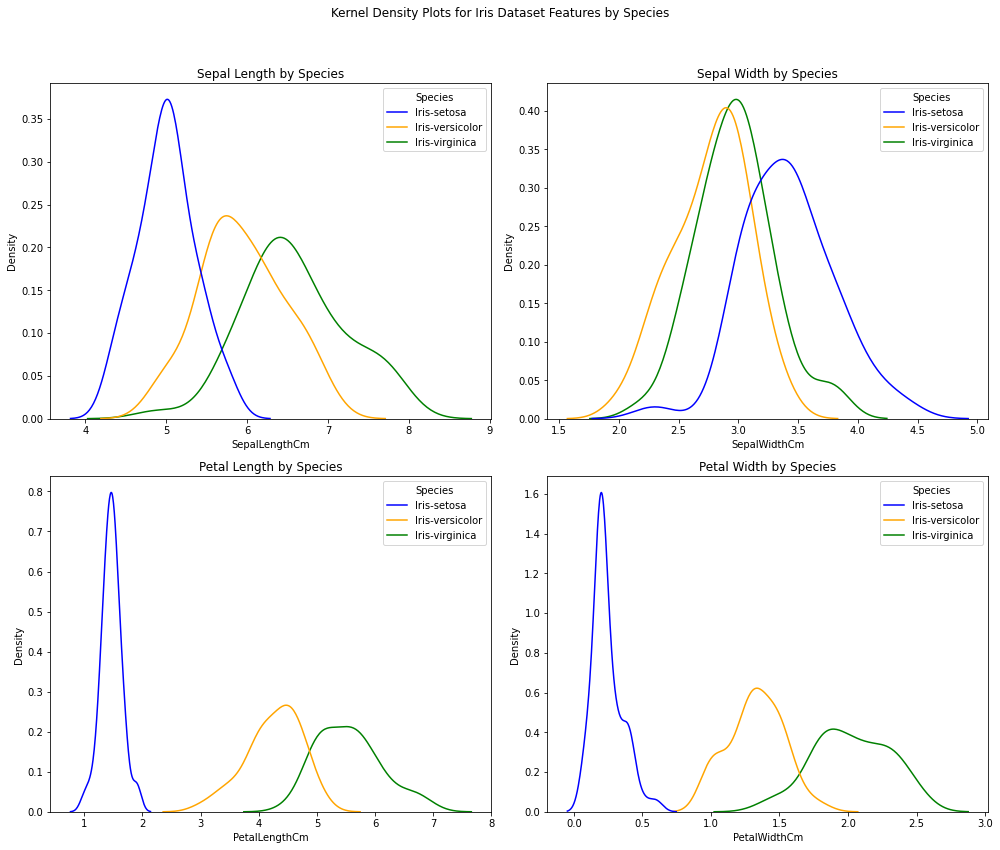

In [5]:
# Define the color palette for species
species_palette = {"Iris-setosa": "blue", "Iris-versicolor": "orange", "Iris-virginica": "green"}

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Kernel Density Plots for Iris Dataset Features by Species')  # Overall title for all the subplots

# Plot each kde on different axes with specified colors
sns.kdeplot(data=df, x='SepalLengthCm', hue='Species', ax=axes[0, 0], palette=species_palette)
axes[0, 0].set_title('Sepal Length by Species')

sns.kdeplot(data=df, x='SepalWidthCm', hue='Species', ax=axes[0, 1], palette=species_palette)
axes[0, 1].set_title('Sepal Width by Species')

sns.kdeplot(data=df, x='PetalLengthCm', hue='Species', ax=axes[1, 0], palette=species_palette)
axes[1, 0].set_title('Petal Length by Species')

sns.kdeplot(data=df, x='PetalWidthCm', hue='Species', ax=axes[1, 1], palette=species_palette)
axes[1, 1].set_title('Petal Width by Species')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplots to fit into figure area.
plt.show()

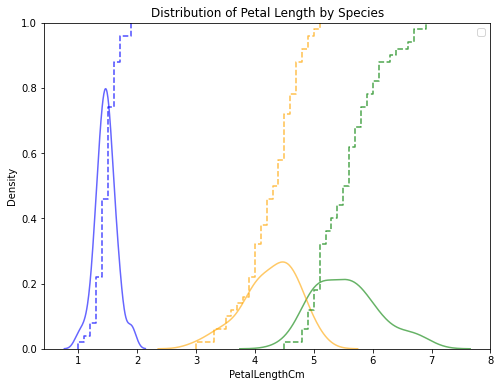

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'PetalLengthCm' and 'Species' are columns in your DataFrame.
# Let's plot both KDE and ECDF plots on the same axes.

# Define the color palette for species
species_palette = {"Iris-setosa": "blue", "Iris-versicolor": "orange", "Iris-virginica": "green"}

# Create a single figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# KDE Plot on the same axes
sns.kdeplot(data=df, x='PetalLengthCm', hue='Species', ax=ax, palette=species_palette, alpha=0.6)
ax.set_title('Distribution of Petal Length by Species')

# ECDF Plot on the same axes
sns.ecdfplot(data=df, x='PetalLengthCm', hue='Species', ax=ax, palette=species_palette, linestyle='--', alpha=0.7)

# Customizing the legend to better explain the plots
handles, labels = ax.get_legend_handles_labels()
new_labels = []
for label in labels[:len(labels)//2]:
    new_labels.append(f"KDE - {label}")  # Append 'KDE -' to the first half of labels
for label in labels[len(labels)//2:]:
    new_labels.append(f"ECDF - {label}")  # Append 'ECDF -' to the second half of labels

ax.legend(handles, new_labels)

# Show the plot
plt.show()

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame loading, replace with your actual DataFrame loading code
# df = pd.read_csv("path_to_iris_dataset.csv")

# Define the color palette for species
species_palette = {"Iris-setosa": "blue", "Iris-versicolor": "orange", "Iris-virginica": "green"}

# Filter data for each species
setosa_data = df[df['Species'] == 'Iris-setosa']['PetalLengthCm']
versicolor_data = df[df['Species'] == 'Iris-versicolor']['PetalLengthCm']
virginica_data = df[df['Species'] == 'Iris-virginica']['PetalLengthCm']

# Define a function to calculate ECDF
def ecdf(data):
    """ Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)  # Number of data points
    x = np.sort(data)  # x-data for the ECDF
    y = np.arange(1, n+1) / n  # y-data for the ECDF
    return x, y

# Calculate ECDF for each species
x_set, y_set = ecdf(setosa_data)
x_vers, y_vers = ecdf(versicolor_data)
x_virg, y_virg = ecdf(virginica_data)

# Threshold for calculation
threshold = 4.8

# Calculate the approximate probabilities below the threshold
prob_set_below_threshold = y_set[np.searchsorted(x_set, threshold, side='right') - 1] if x_set[-1] >= threshold else 1.0
prob_vers_below_threshold = y_vers[np.searchsorted(x_vers, threshold, side='right') - 1]
prob_virg_below_threshold = y_virg[np.searchsorted(x_virg, threshold, side='right') - 1]

print(f"Probability of Setosa with PetalLengthCm < {threshold} cm: {prob_set_below_threshold:.2f}")
print(f"Probability of Versicolor with PetalLengthCm < {threshold} cm: {prob_vers_below_threshold:.2f}")
print(f"Probability of Virginica with PetalLengthCm < {threshold} cm: {prob_virg_below_threshold:.2f}")

Probability of Setosa with PetalLengthCm < 4.8 cm: 1.00
Probability of Versicolor with PetalLengthCm < 4.8 cm: 0.92
Probability of Virginica with PetalLengthCm < 4.8 cm: 0.06


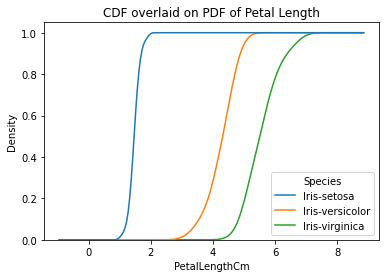

In [8]:
# Assuming 'df' is your DataFrame and 'PetalLengthCm' and 'Species' are columns in your DataFrame.
sns.kdeplot(data=df, x='PetalLengthCm', hue='Species', cumulative=True, common_norm=False, common_grid=True, multiple="layer")
plt.title('CDF overlaid on PDF of Petal Length')
plt.show()